#ME5150 Robótica - Auxiliar 1

Leslie Cárdenas <https://github.com/leslieecv>
<br>
Ulises Campodónico <https://github.com/uwulises> 

#¿Cómo van a funcionar las auxiliares?

- Laboratorios presenciales (a menos que nos ayuden a grabar)
  - Actividades prácticas de simulación de brazos robóticos
  - Actividades prácticas con hardware (cámaras, sensores y manipuladores)

- Temas a tratar en próximas auxiliares
  - Cinemática directa e inversa en simulador
  - Control de posición de manipuladores
  - Control de velocidad de manipuladores y máquinas cartesianas
  - Visión Computacional (usando algoritmos típicos)
  - Control con retroalimentación
    - Manipulación con control por algoritmos evolutivos
    - Manipulación con control por red neuronal
    - Misceláneos (para curiosxs)

- Proyectos. Próximamente...

#Entorno de Simulación: PyBullet


##Definiciones previas

- Modelo 3D en "código" -> URDF
- Modos de control de estados del robot simulado: 
  - Control de Posición/Velocidad
  - Control de Torques/Fuerzas


#From PyBullet (controlMode)

- POSITION_CONTROL (which is in fact CONTROL_MODE_POSITION_VELOCITY_PD)
- VELOCITY_CONTROL
- TORQUE_CONTROL
- PD_CONTROL

- (Experimental) STABLE_PD_CONTROL for stable(implicit) PD control, which
requires additional preparation. See humanoidMotionCapture.py
and pybullet_envs.deep_mimc for STABLE_PD_CONTROL
examples.) TORQUE_CONTROL will apply a torque instantly,
so it only is effective when calling stepSimulation explicitly.

In [27]:
!git clone https://github.com/ros-industrial/kuka_experimental.git

fatal: destination path 'kuka_experimental' already exists and is not an empty directory.


##Instalación de librerías

In [28]:
# Installing PyBullet using pip should take around 20 seconds, since we use precompiled Linux wheels.
# For more info, check the PyBullet quickstart guide here:
# https://docs.google.com/document/d/10sXEhzFRSnvFcl3XxNGhnD4N2SedqwdAvK3dsihxVUA/edit#heading=h.2ye70wns7io3

%%time
!pip install pybullet
!pip install numpngw


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
CPU times: user 98.2 ms, sys: 30.7 ms, total: 129 ms
Wall time: 8.61 s


In [29]:
from google.colab import widgets
import random
import time
#you can enable the GPU by changing the runtime
import os
os.environ['MESA_GL_VERSION_OVERRIDE'] = '3.3'
os.environ['MESA_GLSL_VERSION_OVERRIDE'] = '330'
import pybullet as p
import pybullet_data as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

from numpngw import write_apng
from IPython.display import Image



#Brazo robótico KR16 2

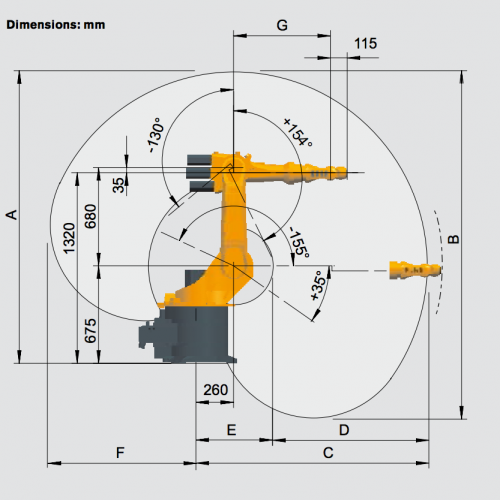

##Inicialización de simulador + carga de modelos

In [30]:
p.connect(p.DIRECT,options='--background_color_red=0.0 --background_color_green=0.0 --background_color_blue=0.0')
#allow to find the assets (URDF, obj, textures etc)
p.setAdditionalSearchPath(pd.getDataPath())

p.resetSimulation()
p.configureDebugVisualizer(p.COV_ENABLE_GUI)
useFixedBase = True #Para que el brazo no flote o se desplace
flags = p.URDF_INITIALIZE_SAT_FEATURES

plane_pos = [0,0,0]

#Carga de modelo URDF

plane = p.loadURDF("plane.urdf", plane_pos, flags = flags, useFixedBase=useFixedBase)
#iiwa = p.loadURDF("kuka_experimental/kuka_lbr_iiwa_support/urdf/lbr_iiwa_14_r820.urdf", plane_pos, flags = flags, useFixedBase=useFixedBase)
kr16 = p.loadURDF("kuka_experimental/kuka_kr16_support/urdf/kr16_2.urdf", plane_pos, flags = flags, useFixedBase=useFixedBase)

##Definición de Posición objetivo 6 DOFs

In [43]:
#p.setJointMotorControlArray(iiwa, range(7), p.POSITION_CONTROL,targetPositions=[0,0,0,0,0,0,0]) #Angulos en grados
p.setJointMotorControlArray(kr16, range(6), p.POSITION_CONTROL,targetPositions=[0,-45,0,0,0,0]) #Angulos en grados

#Posición del brazo en cada estado

In [44]:
#Revisar
def joint_pos_iiwa():
  pos_actual=[]
  for i in range(7):
    pos_actual = np.append(pos_actual,round(p.getJointStates(kr16, range(7))[i][0],2))
  print(pos_actual)


#Actividad: 

##Parte 1) Correr todo el código

##Parte 2) Elegir una configuración de ángulos y estimar posición final del efector con transformaciones.

##Parte 3) Comparar con la versión simulada.

##Parte 4) Jugar

##Parte 5) Pa la casa

#Animasound, no modificar esta parte :) porfis (o solo los nombres del output)

In [50]:
p.resetSimulation()

,
,


creating animated png, please about 5 seconds
CPU times: user 4.62 s, sys: 21.5 ms, total: 4.65 s
Wall time: 4.65 s
CPU times: user 766 µs, sys: 0 ns, total: 766 µs
Wall time: 637 µs
CPU times: user 5 s, sys: 34.2 ms, total: 5.04 s
Wall time: 11.1 s


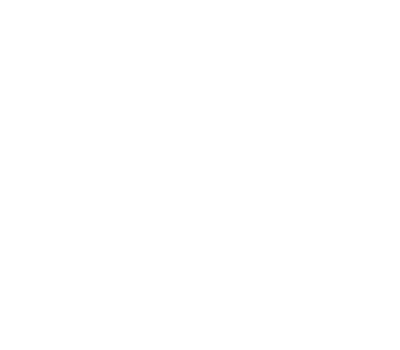

In [51]:
%%time
camTargetPos = [0, 0, 0]
cameraUp = [0, 0, 1]
cameraPos = [1, 1, 1]
p.setGravity(0, 0, -10)
grid = widgets.Grid(2, 2)

frames=[] #frames to create animated png
for r in range(60):
    p.stepSimulation()
    time.sleep(0.1)
    yaw = 120
    pitch = -25.0
    roll = 0
    upAxisIndex = 2
    camDistance = 3
    pixelWidth = 400
    pixelHeight = 350
    nearPlane = 0.01
    farPlane = 100
    fov = 60
    viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
                                                                roll, upAxisIndex)
    aspect = pixelWidth / pixelHeight
    projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)
        
    img_arr = p.getCameraImage(pixelWidth,pixelHeight,viewMatrix,projectionMatrix)
    w = img_arr[0]  #width of the image, in pixels
    h = img_arr[1]  #height of the image, in pixels
    rgb = img_arr[2]  #color data RGB
    dep = img_arr[3]  #depth data
    #print("w=",w,"h=",h)
    np_img_arr = np.reshape(rgb, (h, w, 4))
    frame = np_img_arr[:, :, :3]
    frames.append(frame)
print("creating animated png, please about 5 seconds")
%time write_apng("animacion.png", frames, delay=100)
%time Image(filename="animacion.png")